## Binary Image Classification with Logistic Regression
This notebook demonstrates a simple yet effective implementation of a binary image classifier using Logistic Regression from scratch — without using any high-level machine learning libraries like TensorFlow or PyTorch.
We work with a dataset of cat and dog images, performing the following tasks:
- Preprocess and normalize image data
- Implement core machine learning functions manually:
       - sigmoid(), propagate(), optimize(), and predict()
- Train the model using gradient descent with the cross-entropy loss
- Evaluate accuracy on both training and test sets
- Visualize learning performance over time (cost vs. iterations)
- Use the trained model to predict custom unseen images


## Step 1: Import Required Libraries

In this section, we import all the libraries necessary for the project:

- `os`: to handle file and directory operations.
- `numpy`: for numerical computations, especially arrays and matrices.
- `PIL.Image`: to load and manipulate images.
- `copy`: to safely duplicate Python objects.
- `matplotlib.pyplot`: to visualize images and data.

These libraries will support image loading, manipulation, and visualization for our binary classification task.


In [78]:
# ================================
# 📦 Import Required Libraries
# ================================

import os  # For interacting with the operating system (file paths, directories)
import numpy as np  # For numerical computations and array operations
from PIL import Image  # For loading and processing images
import copy  # For deep copying Python objects
import matplotlib.pyplot as plt  # For plotting and visualization


## Step 2: Set Dataset Paths

This project uses an image dataset downloaded from [Kaggle](https://www.kaggle.com/). 

Make sure to:
1. Download the dataset manually from the Kaggle link.
2. Extract it into a folder named `data` located in the same directory as this notebook.
3. Ensure the following folder structure:

In [80]:
# ================================
# 📁 Set Paths to Image Directories
# ================================

# Update these paths according to where you've extracted the dataset
train_data_dir = './dataset/training_set'
test_data_dir = './dataset/test_set'


## Step 3: Load and Preprocess Image Data

We define a helper function `load_data_combined()` that:

- Loads training and test images from separate folders (e.g., `Cat/`, `Dog/`)
- Resizes each image to 64x64 pixels to reduce computation
- Converts all images to RGB (in case of grayscale or RGBA inputs)
- Labels each image as `0` (Cat) or `1` (Dog)
- Flattens each image from `(64, 64, 3)` → `(12288, 1)`
- Normalizes pixel values to a `[0, 1]` range
- Returns original and processed datasets, along with class names

The final shape of the data will be:
- `train_set_x`: (12288, m_train)
- `train_set_y`: (1, m_train)
- `test_set_x`: (12288, m_test)
- `test_set_y`: (1, m_test)

In [81]:
# =====================================
# 🧠 Load and Preprocess Image Data
# =====================================

def load_data_combined(train_data_dir, test_data_dir):
    """
    Loads and preprocesses training and test datasets.
    - Reads images from directory structure: each class in a separate folder (e.g., 'Cat', 'Dog')
    - Resizes images to 64x64 pixels
    - Flattens and normalizes them
    - Converts labels into binary values (0 for Cat, 1 for Dog)

    Returns:
        train_set_x: flattened and normalized training images
        train_set_y: training labels
        test_set_x: flattened and normalized test images
        test_set_y: test labels
        train_set_x_orig: original (non-flattened) training images
        classes: list of class names
    """
    def load_images_with_labels(folder):
        images = []
        labels = []
        class_names = []

        for subfolder in os.listdir(folder):
            class_names.append(subfolder)
            label = 1 if subfolder.lower() == 'dog' else 0  # Dog = 1, Cat = 0
            subfolder_path = os.path.join(folder, subfolder)
            
            for filename in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, filename)

                try:
                    img = Image.open(img_path).resize((64, 64)).convert('RGB')  # Ensure 3 channels
                    img_array = np.array(img)
                    images.append(img_array)
                    labels.append(label)
                except Exception as e:
                    print(f"Skipping file {img_path}: {e}")
        
        return np.array(images), np.array(labels), class_names

    # Load raw image data
    train_set_x_orig, train_set_y, train_classes = load_images_with_labels(train_data_dir)
    test_set_x_orig, test_set_y, test_classes = load_images_with_labels(test_data_dir)

    # Flatten image data from (m, 64, 64, 3) → (12288, m)
    train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
    test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

    # Normalize pixel values (0–255 → 0–1)
    train_set_x = train_set_x_flatten / 255.0
    test_set_x = test_set_x_flatten / 255.0

    # Reshape labels to (1, m)
    train_set_y = train_set_y.reshape(1, -1)
    test_set_y = test_set_y.reshape(1, -1)

    # Use train classes for reference (assuming both sets share the same classes)
    classes = train_classes

    return train_set_x, train_set_y, test_set_x, test_set_y, train_set_x_orig, classes


## Step 4: Load and Inspect the Dataset

We now call the `load_data_combined()` function to load and preprocess the image dataset.

This step is crucial for verifying:
- The shape and structure of training and test data
- That labels are correctly formatted
- The number of classes detected from the folder structure

You should see shapes like:

- `train_set_x`: (12288, number of training examples)
- `train_set_y`: (1, number of training examples)
- `test_set_x`: (12288, number of test examples)
- `test_set_y`: (1, number of test examples)

In [82]:
# ======================================
# ✅ Load Data and Verify Dimensions
# ======================================

# Load processed data from folders
train_set_x, train_set_y, test_set_x, test_set_y, train_set_x_orig, classes = load_data_combined(
    train_data_dir, test_data_dir
)

# Print shapes to confirm successful preprocessing
print("✅ Dataset Loaded Successfully!")
print(f"🔹 Training set images shape: {train_set_x.shape}")   # Expected: (12288, m_train)
print(f"🔹 Training set labels shape: {train_set_y.shape}")   # Expected: (1, m_train)")
print(f"🔹 Test set images shape: {test_set_x.shape}")        # Expected: (12288, m_test)
print(f"🔹 Test set labels shape: {test_set_y.shape}")        # Expected: (1, m_test)")
print(f"🔹 Classes found: {classes}")                         # Expected: ['Cat', 'Dog']


✅ Dataset Loaded Successfully!
🔹 Training set images shape: (12288, 4000)
🔹 Training set labels shape: (1, 4000)
🔹 Test set images shape: (12288, 1000)
🔹 Test set labels shape: (1, 1000)
🔹 Classes found: ['Cat', 'Dog']


## Step 5: Visualize a Sample Image

To verify that our labels align correctly with the images, we visualize a sample image from the training dataset using `matplotlib`.

In this example:
- The image at index `2000` is displayed.
- The label is printed alongside, mapped to its corresponding class name (e.g., `'Cat'` or `'Dog'`).

Feel free to change the index to explore other examples in the dataset.

y = 1 → It's a 'Dog' picture.


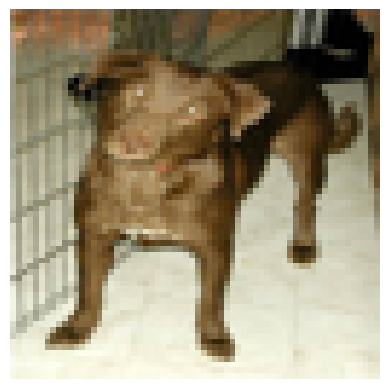

In [83]:
# ========================================
# 🖼️ Visualize an Example from the Dataset
# ========================================

# Index of the example to view
index = 2000

# Display the image and corresponding label
plt.imshow(train_set_x_orig[index])
plt.axis('off')  # Hide axis ticks
label = np.squeeze(train_set_y[:, index])
print(f"y = {label} → It's a '{classes[label]}' picture.")


## Step 6: Define Helper Functions for Parameter Initialization and Activation

We create three functions:

- `initialize_with_zeros(dim)`: initializes weights as zeros and bias as zero.
- `sigmoid(z)`: computes the sigmoid activation function, key for binary classification.
- `random_initialization(dim)`: initializes weights randomly with small values to help break symmetry during training.

These building blocks prepare parameters for the logistic regression model.

In [84]:
# ====================================
# ⚙️ Helper Functions: Initialization and Activation
# ====================================

def initialize_with_zeros(dim):
    """
    Initialize weight vector and bias to zeros.
    
    Args:
        dim (int): size of the weight vector
    
    Returns:
        w (ndarray): initialized weight vector of shape (dim, 1)
        b (float): initialized bias (scalar)
    """
    w = np.zeros((dim, 1))
    b = 0.0
    return w, b

def sigmoid(z):
    """
    Compute the sigmoid of z.
    
    Args:
        z (ndarray or float): input value or array
    
    Returns:
        s (ndarray or float): sigmoid(z)
    """
    s = 1 / (1 + np.exp(-z))
    return s

def random_initialization(dim):
    """
    Initialize weights randomly with small values and bias to zero.
    
    Args:
        dim (int): size of the weight vector
    
    Returns:
        w (ndarray): randomly initialized weight vector
        b (float): initialized bias (scalar)
    """
    w = np.random.randn(dim, 1) * 0.01  # Small random values to break symmetry
    b = 0.0
    return w, b


## Step 7: Forward and Backward Propagation

The `propagate()` function computes:

- The **forward propagation**, using the sigmoid activation to get predictions.
- The **cross-entropy cost** to quantify prediction error.
- The **backward propagation**, calculating gradients of the cost with respect to the parameters `w` and `b`.

These gradients will be used to update the parameters during optimization.

In [85]:
# ============================================
# 🔄 Forward and Backward Propagation Function
# ============================================

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for logistic regression.

    Args:
        w (ndarray): weights, shape (num_features, 1)
        b (float): bias, scalar
        X (ndarray): data of shape (num_features, number_of_examples)
        Y (ndarray): true "label" vector of shape (1, number_of_examples)

    Returns:
        grads (dict): dictionary containing gradients 'dw' and 'db'
        cost (float): cross-entropy cost for current parameters
    """
    m = X.shape[1]  # Number of training examples
    
    # Forward propagation
    A = sigmoid(np.dot(w.T, X) + b)             # Compute activation
    cost = (-1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))  # Compute cost
    
    # Backward propagation
    dw = (1 / m) * np.dot(X, (A - Y).T)         # Gradient of the loss with respect to w
    db = (1 / m) * np.sum(A - Y)                 # Gradient of the loss with respect to b
    
    cost = np.squeeze(cost)  # Ensure cost is scalar
    
    grads = {"dw": dw, "db": db}  # Store gradients
    
    return grads, cost


## Step 8: Optimize Parameters with Gradient Descent

The `optimize()` function runs gradient descent for a specified number of iterations:

- Updates weights and bias using gradients computed from `propagate()`
- Records the cost every 1000 iterations to track convergence
- Optionally prints cost to monitor training progress

The output includes:
- Optimized parameters (`w`, `b`)
- Final gradients
- Cost history for plotting or analysis

In [86]:
# ====================================
# ⚙️ Optimization Function: Gradient Descent
# ====================================

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    """
    Optimize weights and bias by running gradient descent.

    Args:
        w (ndarray): initial weights, shape (num_features, 1)
        b (float): initial bias
        X (ndarray): training data, shape (num_features, number_of_examples)
        Y (ndarray): true labels, shape (1, number_of_examples)
        num_iterations (int): number of iterations to run gradient descent
        learning_rate (float): learning rate for parameter updates
        print_cost (bool): if True, prints cost every 1000 iterations

    Returns:
        params (dict): updated weights and bias
        grads (dict): final gradients
        costs (list): list of costs at intervals during optimization
    """
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    costs = []

    for i in range(num_iterations):
        # Forward and backward propagation to get gradients and cost
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]

        # Update parameters
        w = w - learning_rate * dw
        b = b - learning_rate * db

        # Record and optionally print cost every 1000 iterations
        if i % 1000 == 0:
            costs.append(cost)
            if print_cost:
                print(f"Cost after iteration {i}: {cost:.6f}")

    params = {"w": w, "b": b}
    return params, grads, costs



## Step 9: Predict Labels on New Data

The `predict()` function computes predicted labels (0 or 1) for a given dataset `X`, using learned parameters `w` and `b`.

It applies the sigmoid function to compute probabilities and applies a threshold of 0.5 to classify the inputs.


In [87]:
# ===============================
# 🎯 Prediction Function
# ===============================

def predict(w, b, X):
    """
    Predict whether the label is 0 or 1 using learned logistic regression parameters.

    Args:
        w (ndarray): weights, shape (num_features, 1)
        b (float): bias, scalar
        X (ndarray): data, shape (num_features, number_of_examples)

    Returns:
        Y_prediction (ndarray): predicted labels (0/1), shape (1, number_of_examples)
    """
    m = X.shape[1]  # Number of examples
    Y_prediction = np.zeros((1, m))

    # Compute probabilities using sigmoid
    A = sigmoid(np.dot(w.T, X) + b)

    # Convert probabilities to binary predictions (threshold 0.5)
    Y_prediction = (A > 0.5).astype(int)

    return Y_prediction


## Step 10: Train the Logistic Regression Model

The `model()` function integrates all previous steps:

- Initializes parameters
- Optimizes them via gradient descent
- Predicts labels on train and test data
- Calculates accuracy to evaluate performance

Returns a dictionary containing learned parameters, predictions, costs history, and hyperparameters.

In [88]:
# ===============================
# 🔄 Complete Logistic Regression Model
# ===============================

def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate, print_cost=False):
    """
    Build and train the logistic regression model.

    Args:
        X_train (ndarray): training data, shape (num_features, num_train_examples)
        Y_train (ndarray): training labels, shape (1, num_train_examples)
        X_test (ndarray): test data, shape (num_features, num_test_examples)
        Y_test (ndarray): test labels, shape (1, num_test_examples)
        num_iterations (int): number of iterations for optimization
        learning_rate (float): learning rate for gradient descent
        print_cost (bool): whether to print cost and accuracy during training

    Returns:
        data (dict): dictionary containing costs, predictions, parameters, and hyperparameters
    """
    # Initialize parameters randomly
    w, b = random_initialization(X_train.shape[0])

    # Optimize parameters using gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    w = parameters["w"]
    b = parameters["b"]

    # Predict on training and test sets
    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)

    # Calculate and print accuracy if requested
    if print_cost:
        train_accuracy = 100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100
        test_accuracy = 100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100
        print(f"Training accuracy: {train_accuracy:.2f} %")
        print(f"Test accuracy: {test_accuracy:.2f} %")

    # Store useful outputs in dictionary
    data = {
        "costs": costs,
        "Y_prediction_train": Y_prediction_train,
        "Y_prediction_test": Y_prediction_test,
        "w": w,
        "b": b,
        "learning_rate": learning_rate,
        "num_iterations": num_iterations,
    }
    
    return data


## Step 11: Train and Evaluate the Model

Here we load the data and train the logistic regression model with 10,000 iterations and a learning rate of 0.002. The training and test accuracies are printed during training.

We also display some sample predictions and parameter shapes for verification.

In [93]:
# ===============================
# 🚀 Train and Test the Logistic Regression Model
# ===============================

# Load the dataset (ensure directories are set correctly)
train_set_x, train_set_y, test_set_x, test_set_y, train_set_x_orig, classes = load_data_combined(train_data_dir, test_data_dir)

# Train the model with specified hyperparameters
model_results = model(
    train_set_x, train_set_y,
    test_set_x, test_set_y,
    num_iterations=10000,
    learning_rate=0.002,
    print_cost=True
)

# Optional: check final shapes and sample predictions
print(f"Final weights shape: {model_results['w'].shape}")
print(f"Final bias: {model_results['b']}")
print(f"Sample test predictions: {model_results['Y_prediction_test'][:, :10]}")


Cost after iteration 0: 0.714061
Cost after iteration 1000: 0.640194
Cost after iteration 2000: 0.623278
Cost after iteration 3000: 0.610553
Cost after iteration 4000: 0.600144
Cost after iteration 5000: 0.591282
Cost after iteration 6000: 0.583532
Cost after iteration 7000: 0.576620
Cost after iteration 8000: 0.570362
Cost after iteration 9000: 0.564629
Training accuracy: 72.88 %
Test accuracy: 60.60 %
Final weights shape: (12288, 1)
Final bias: -0.027802806815437255
Sample test predictions: [[0 1 0 1 1 1 0 1 1 0]]


## Step 12: Visualize Learning Curve

The cost function is plotted against the number of iterations to visualize how well the model converges during training.

Note that costs were recorded every 1000 iterations.

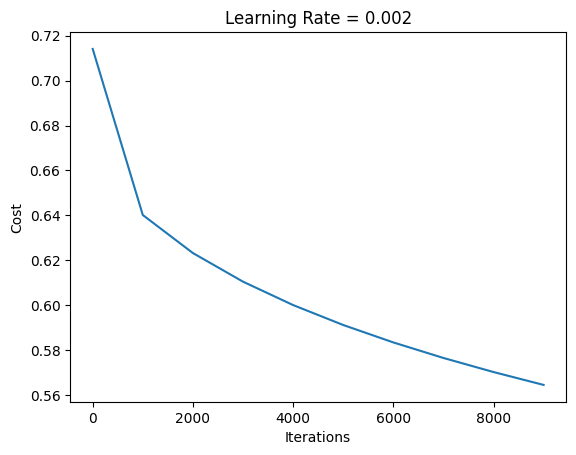

In [96]:
# Plotting the cost over iterations to visualize convergence

costs = np.squeeze(model_results['costs'])
plt.plot(np.arange(len(costs)) * 1000, costs)  # x-axis scaled by 1000 iterations
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.title(f"Learning Rate = {model_results['learning_rate']}")
plt.show()


## Step 13: Predict on Your Own Image Using a Utility Function

This function allows you to test the model on any new image by providing the image path. It automatically preprocesses the image, makes a prediction using the trained logistic regression model, and visualizes the result.

### Usage Example:

```python
my_image_path = r'path_to_your_image.jpg'
predict_single_image(my_image_path, parameters, classes)

In [97]:
# ================================================
# 🔍 Utility Function: Predict a Single Image
# ================================================

def predict_single_image(image_path, model_params, class_names, image_size=(64, 64)):
    """
    Predicts and displays the result for a single image using the trained model.

    Args:
        image_path (str): Path to the image file.
        model_params (dict): Trained model parameters ('w', 'b').
        class_names (list): Class names (e.g., ['Cat', 'Dog']).
        image_size (tuple): Target size for resizing the image (default: (64, 64)).
    """
    try:
        # Load and preprocess the image
        image = Image.open(image_path).resize(image_size)
        image_np = np.array(image).astype(np.float32) / 255.0  # Normalize
        image_vector = image_np.reshape((1, image_size[0] * image_size[1] * 3)).T  # Flatten to column vector

        # Predict using the trained model
        prediction = predict(model_params["w"], model_params["b"], image_vector)
        predicted_class = int(np.squeeze(prediction))

        # Show image and predicted label
        plt.imshow(image)
        plt.axis('off')  # Hide axis ticks
        plt.title(f"Prediction: {class_names[predicted_class]}")
        plt.show()

        print("y = " + str(np.squeeze(prediction)))
        print(f"The model predicts a \"{class_names[predicted_class]}\" picture.")

    except FileNotFoundError:
        print(f"❌ File not found: {image_path}")
    except Exception as e:
        print(f"⚠️ Error processing image: {e}")


## 🖼️ Step 14: Test the Model with Your Own Image

You can use your own image to see how well the trained model performs on unseen data. Just provide the path to your image and run the prediction function.

```python
# Replace with your actual image path
my_image_path = './dataset/manual_set/1.jpg'

predict_single_image(my_image_path, model_results, classes)


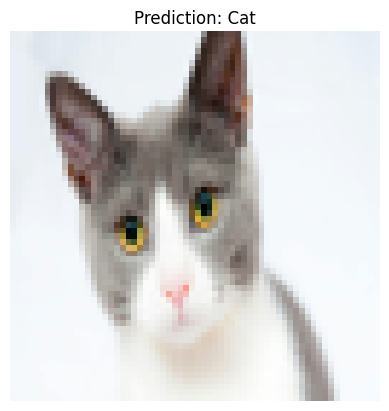

y = 0
The model predicts a "Cat" picture.


In [99]:
# Replace with your actual image path
my_image_path = './dataset/manual_set/4.jpg'

predict_single_image(my_image_path, model_results, classes)

### Learning Rate Optimization: An Empirical Evaluation
To enhance model performance, a systematic evaluation of various learning rates will be undertaken. This investigative process is integral to artificial intelligence development, which relies on iterative exploration and empirical testing to determine optimal hyperparameter configurations and their impact on convergence and overall efficacy.

In [101]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    """
    Optimize weights and bias by running gradient descent.

    Args:
        w (ndarray): initial weights, shape (num_features, 1)
        b (float): initial bias
        X (ndarray): training data, shape (num_features, number_of_examples)
        Y (ndarray): true labels, shape (1, number_of_examples)
        num_iterations (int): number of iterations to run gradient descent
        learning_rate (float): learning rate for parameter updates
        print_cost (bool): if True, prints cost every 1000 iterations

    Returns:
        params (dict): updated weights and bias
        grads (dict): final gradients
        costs (list): list of costs at intervals during optimization
    """
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    costs = []

    for i in range(num_iterations):
        # Forward and backward propagation to get gradients and cost
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]

        # Update parameters
        w = w - learning_rate * dw
        b = b - learning_rate * db

        # Record and optionally print cost every 1000 iterations
        if i % 100 == 0:
            costs.append(cost)
            if print_cost:
                print(f"Cost after iteration {i}: {cost:.6f}")

    params = {"w": w, "b": b}
    return params, grads, costs

Training a model with learning rate: 0.01

-------------------------------------------------------

Training a model with learning rate: 0.001

-------------------------------------------------------

Training a model with learning rate: 0.0001

-------------------------------------------------------



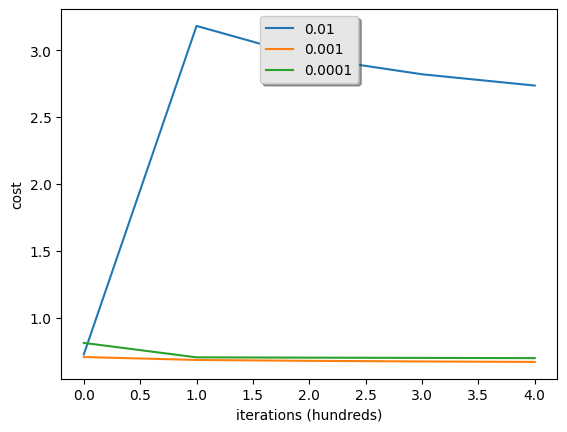

In [102]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=500, learning_rate=lr, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()